___
# Project-06: Salary
___

___
## Information about the dataset
___

___
## Importing Project Dependencies
___

In [2]:
!pip install feature-engine

In [3]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('dark_background')


# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

___
## Importing data and making it ready for Analysis
___

In [4]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [5]:
# import the data
df = pd.read_csv('adult.data',header=None,names=column_names)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# no of observations
len(df)

32561

In [8]:
# no of columns
len(df.columns)

15

In [9]:
# description of the datset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# check for missing data (np.nan/blank)
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

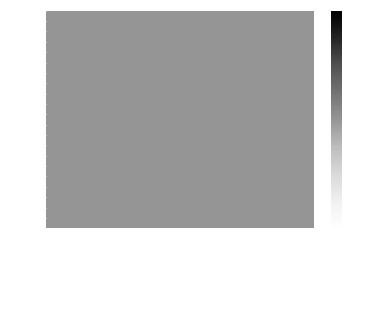

In [11]:
sns.heatmap(df.isna(),cmap='Greys')

In [12]:
# There are some missing values in the datset which are represented by '?'
# Let's convert them to NaNs
df[df == ' ?'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [13]:
# total number of values missing from each of the columns in the datframe
df.isna().sum()

age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

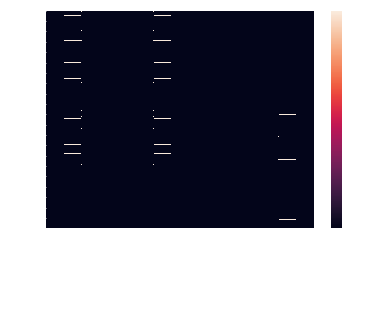

In [14]:
# heatmap of all the missing data
sns.heatmap(df.isna())

In [15]:
# percentage of data missing from each column of the dataframe
df.isna().mean()

age                0.000000
workclass          0.056386
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.056601
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017905
income             0.000000
dtype: float64

#### Inference
* There are 15 Columns in the dataset (14 Features and 1 Target Class).
* There are in total 32,561 observations in the datset.
* There were np missing values (np.nan/NaN/blank) found in the dataset but the dataset contains '?' as some missing values.
* All the colums with missing data(?) have missing data less than 5.7% of the total vaules in the column
* capital-gain and capital-loss are the two columns to look forward to.
* The dataset contains nominal(such as marital-status),ordinal(such as education),binary(gender),continous as well as discrete featrues
* Take a look at the target variable:
 * --> it has 2 classes:
    * 1: >50K
    * 2: <=50K
    * We need to it convert it into machine learning compatible values


___
##EDA
___

In [16]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Univariate Analysis

#### Age

In [17]:
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [18]:
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

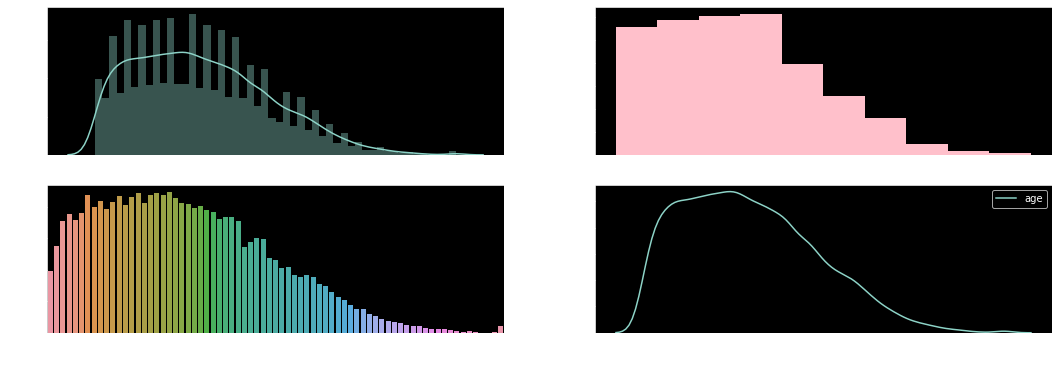

In [19]:
fig = plt.figure(figsize=(18,6))

fig.add_subplot(221)
sns.distplot(df.age)

fig.add_subplot(222)
plt.hist(df.age,color='pink')

fig.add_subplot(223,)
sns.countplot(df.age)

fig.add_subplot(224)
sns.kdeplot(df.age)

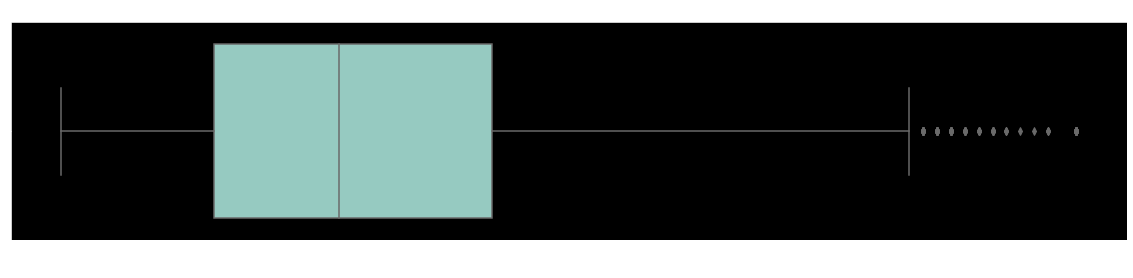

In [20]:
plt.figure(figsize=(20,4))

plt.title('Age with outliers')
sns.boxplot(df.age)

In [21]:
# from the box plot we can interpret that the outliers may be present about 0.99 quantile.
# Let's remove those observations whose lies above 99% of all the ages.
q = df.age.quantile(0.99)

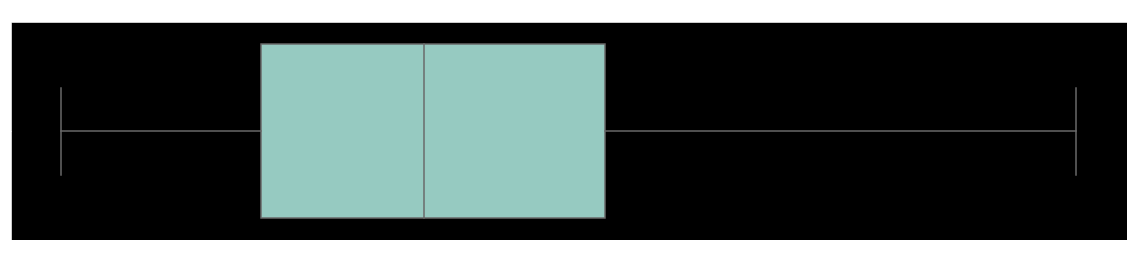

In [22]:
plt.figure(figsize=(20,4))
plt.title('age without outliers')
sns.boxplot(df[df.age<q]['age'])

* pretty good results.

In [23]:
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned.age<q]

In [24]:
df_cleaned.workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
 State-gov            1293
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [25]:
# number of obs removed 
len(df)-len(df_cleaned)

337

In [26]:
# percentage of observations removed
337/32561*100

1.034980498141949

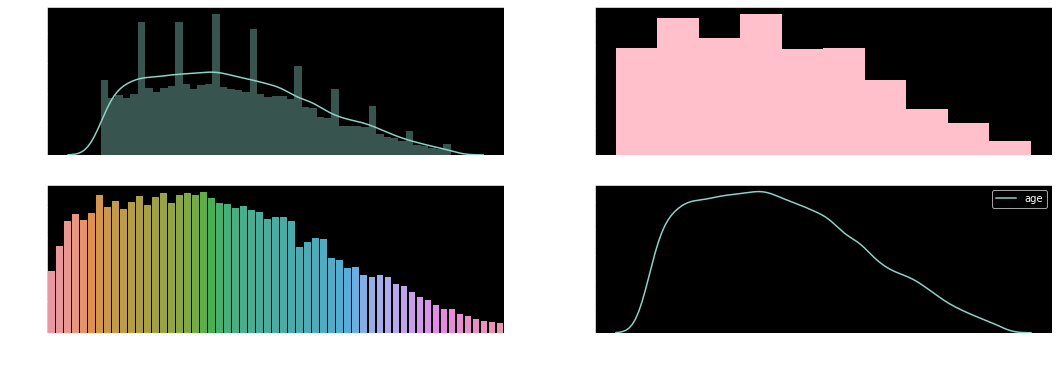

In [27]:
fig = plt.figure(figsize=(18,6))

fig.add_subplot(221)
sns.distplot(df_cleaned.age)

fig.add_subplot(222)
plt.hist(df_cleaned.age,color='pink')

fig.add_subplot(223,)
sns.countplot(df_cleaned.age)

fig.add_subplot(224)
sns.kdeplot(df_cleaned.age)

* This plot looks pretty neat though a bit skewed.

* Log transformation makes the model interpretation complex so let's just keep it simple and remove the outliers

In [28]:
df_cleaned.describe()['age']

count    32224.000000
mean        38.157367
std         13.051509
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         73.000000
Name: age, dtype: float64

In [29]:
age_df = pd.DataFrame((df.describe()['age'],df_cleaned.describe()['age']),index=['before','after']).T
age_df

,before,after
count,32561.000000,32224.000000
mean,38.581647,38.157367
std,13.640433,13.051509
min,17.000000,17.000000
25%,28.000000,28.000000
50%,37.000000,37.000000
75%,48.000000,47.000000
max,90.000000,73.000000


* Thre is no affect of the transformation on the overall stats of the feature. 

#### Workclass

In [30]:
df_cleaned.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
df_cleaned.workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
 State-gov            1293
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [32]:
# In the workclass column there is a space[_] before every attribute of the workclass,let's strip that
df_cleaned.workclass = df_cleaned.workclass.str.lstrip()
df_cleaned.workclass.value_counts()

Private             22570
Self-emp-not-inc     2475
Local-gov            2076
State-gov            1293
Self-emp-inc         1090
Federal-gov           955
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [33]:
# missing data in the workclass columns
df_cleaned.isna().sum()

age                   0
workclass          1744
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1751
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      578
income                0
dtype: int64

In [34]:
# There are 1744 missing values in the feature workclass

In [35]:
# percent of unknown/missing data
1744/len(df_cleaned)

0.054121151936444886

In [36]:
# So the missing data is about 5 percent of the workclass feature

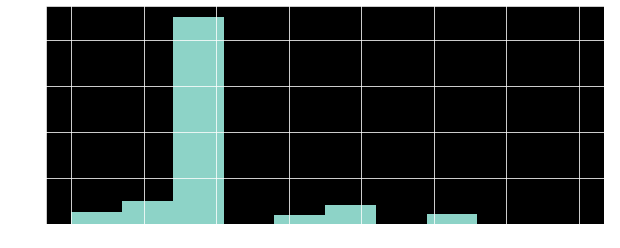

In [37]:
plt.figure(figsize=(10,4))
df_cleaned.workclass.hist()

In [38]:
# Let's impute with the mean category
from feature_engine.missing_data_imputers import CategoricalVariableImputer
cat_imputer = CategoricalVariableImputer(fill_value='Local-gov',variables=['workclass'])

In [39]:
# impute the workplace column
df_cleaned = cat_imputer.fit_transform(df_cleaned)

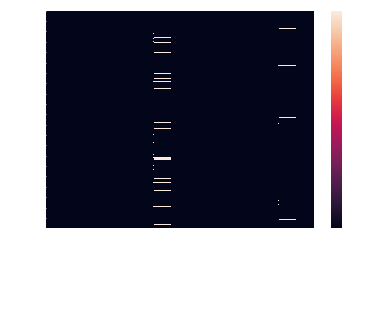

In [40]:
sns.heatmap(df_cleaned.isna())

* We have imputed the data using the median category 'Local-gov'

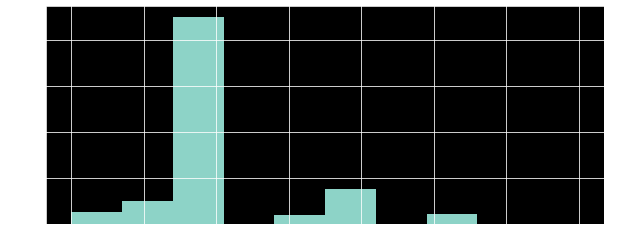

In [41]:
plt.figure(figsize=(10,4))
df_cleaned.workclass.hist()

In [42]:
# The attributes of the workclass columns : Without pay and never worked are too less to positively impact the data.
# Thus removing those values would be a better option for our modelling

In [43]:
df_cleaned.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
df_cleaned = df_cleaned[df_cleaned.workclass!='Without-pay']
df_cleaned = df_cleaned[df_cleaned.workclass!='Never-worked']

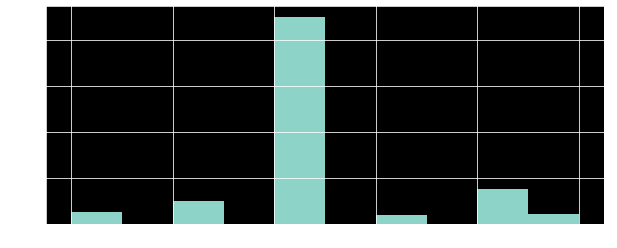

In [45]:
plt.figure(figsize=(10,4))
df_cleaned.workclass.hist()

In [46]:
print('{0:0.2f}% of people are working the in the private sector'.format(df_cleaned.workclass.value_counts()[0]/len(df_cleaned)*100))

70.09% of people are working the in the private sector


In [47]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Education and Education-num

In [48]:
df_cleaned.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
df_cleaned.education.value_counts()

 HS-grad         10389
 Some-college     7235
 Bachelors        5315
 Masters          1701
 Assoc-voc        1374
 11th             1166
 Assoc-acdm       1061
 10th              918
 7th-8th           612
 Prof-school       562
 9th               503
 12th              432
 Doctorate         403
 5th-6th           322
 1st-4th           160
 Preschool          50
Name: education, dtype: int64

In [50]:
df_cleaned.education = df_cleaned.education.str.lstrip()

In [51]:
df_cleaned.education.value_counts()

HS-grad         10389
Some-college     7235
Bachelors        5315
Masters          1701
Assoc-voc        1374
11th             1166
Assoc-acdm       1061
10th              918
7th-8th           612
Prof-school       562
9th               503
12th              432
Doctorate         403
5th-6th           322
1st-4th           160
Preschool          50
Name: education, dtype: int64

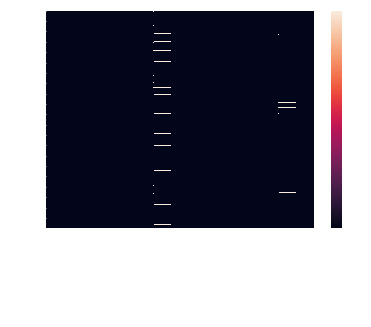

In [52]:
# find the missing values in the education feature
sns.heatmap(df_cleaned.isna())

In [53]:
# there is no missing data in the education feature.

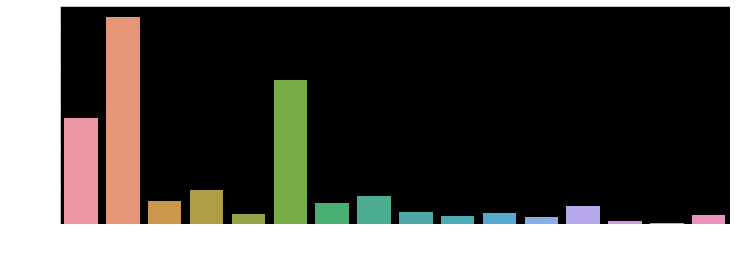

In [54]:
plt.figure(figsize=(12,4))
sns.countplot(df_cleaned.education)

In [55]:
# Check the correlation between features education and education number
edu_df = df_cleaned.iloc[:,3:5].copy()
edu_df.sort_values(by='educational-num',inplace=True)

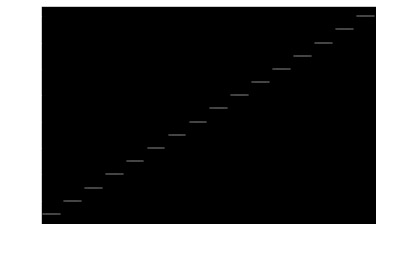

In [56]:
sns.boxplot(edu_df.iloc[:,0],edu_df.iloc[:,1])

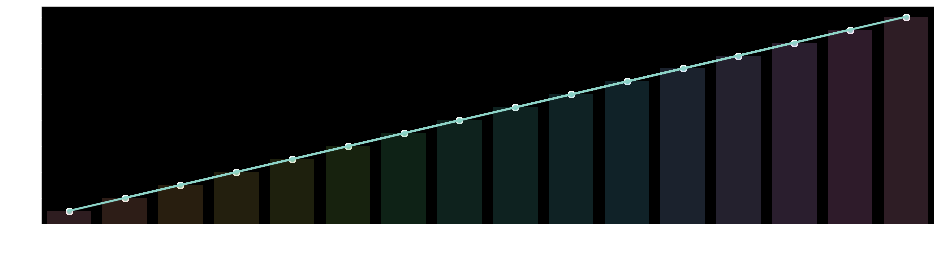

In [57]:
plt.figure(figsize=(16,4))
sns.scatterplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.lineplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.barplot(edu_df.iloc[:,0],edu_df.iloc[:,1],alpha=0.2)

* We can see that the education number represents the ordinal encoding of the education feature
* So we should drop the column `education` from the df_cleaned(The one for model training)

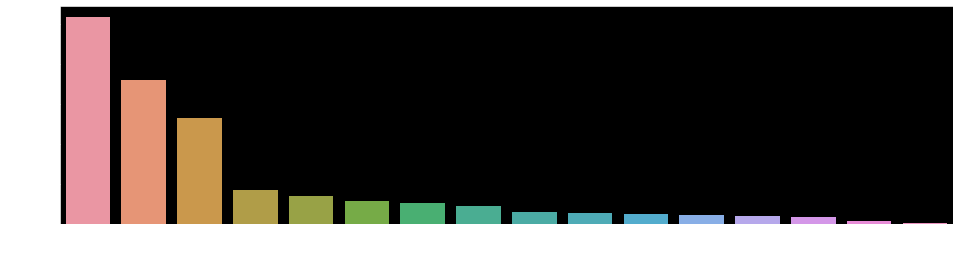

In [58]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned.education,order=df_cleaned.education.value_counts().index)

*  Most of the population in the dataset are `highschool graduates` follows by population studying in `some-college`
* This is a salary predction dataset and there are some observations in the dataset which are potential not capable of having a income.

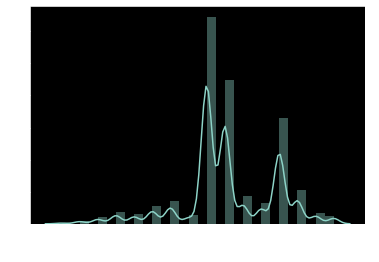

In [59]:
sns.distplot(df_cleaned['educational-num'],bins=30)

In [60]:
# let's drop the education column from the df_cleaned dataset
df_cleaned.drop('education',1,inplace=True)

In [61]:
df_cleaned.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Maritial-Status

In [62]:
df_cleaned['marital-status'].value_counts()

 Married-civ-spouse       14802
 Never-married            10642
 Divorced                  4426
 Separated                 1022
 Widowed                    879
 Married-spouse-absent      410
 Married-AF-spouse           22
Name: marital-status, dtype: int64

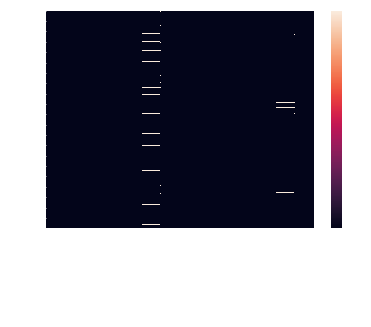

In [63]:
# check for missing data
sns.heatmap(df_cleaned.isna())

In [64]:
# no missing data

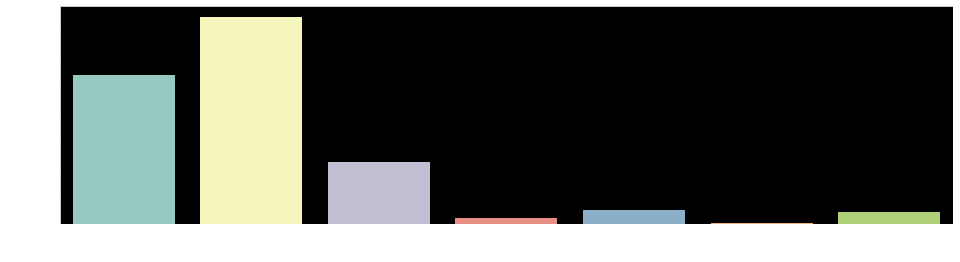

In [65]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned['marital-status'])

In [66]:
# MOst of the people in the dataset are moarried

#### Occupation

In [67]:
df_cleaned.occupation.value_counts()

 Prof-specialty       4103
 Craft-repair         4082
 Exec-managerial      4020
 Adm-clerical         3737
 Sales                3616
 Other-service        3265
 Machine-op-inspct    1995
 Transport-moving     1588
 Handlers-cleaners    1363
 Farming-fishing       971
 Tech-support          928
 Protective-serv       642
 Priv-house-serv       140
 Armed-Forces            9
Name: occupation, dtype: int64

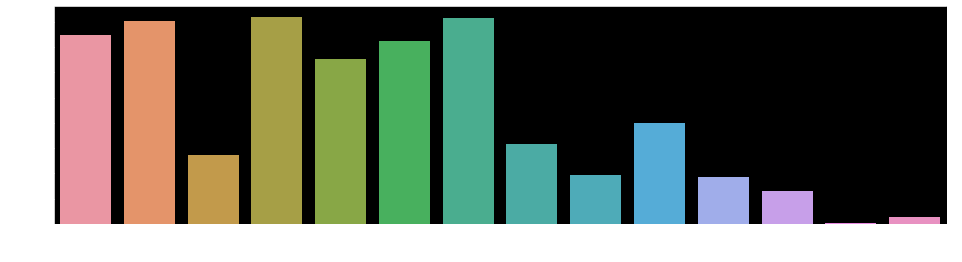

In [68]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned.occupation)

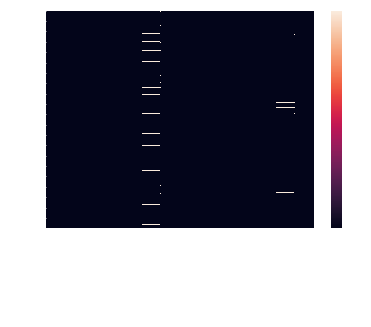

In [69]:
# check for missing values inthe occupation dataset
sns.heatmap(df_cleaned.isna())

In [70]:
df_cleaned.isna().mean()

age                0.000000
workclass          0.000000
fnlwgt             0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.054156
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017949
income             0.000000
dtype: float64

* There are some missing features in in occupation feature
* Around 5.5 percent of data is missing form the occupation feature.
* As th occupation feature follow a uniform distribution ,it is better to drop the columns with the missing occupation values


In [71]:
len(df_cleaned)

32203

In [72]:
# drop the missing values
df_cleaned.dropna(subset=['occupation'],inplace=True)

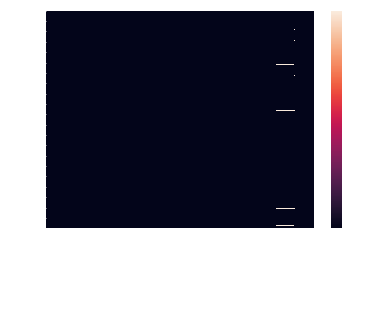

In [73]:
sns.heatmap(df_cleaned.isna())

* Thats what you strive for `a clean slate`

In [74]:
df_cleaned.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Native Country

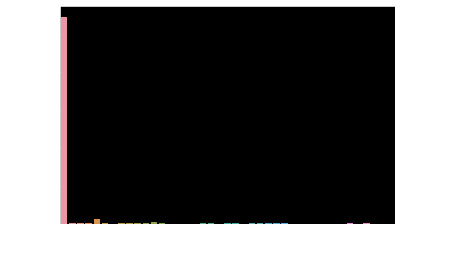

In [75]:
sns.countplot(df_cleaned['native-country'])

In [76]:
df_cleaned['native-country'].value_counts()

 United-States                 27267
 Mexico                          609
 Philippines                     185
 Germany                         127
 Puerto-Rico                     108
 Canada                          107
 India                           100
 El-Salvador                      99
 Cuba                             90
 England                          85
 Jamaica                          80
 South                            70
 China                            68
 Italy                            67
 Dominican-Republic               66
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         55
 Poland                           54
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

* This dataset is centred around people living in the States

In [77]:
df['native-country'].value_counts()[0]/len(df)*100

89.5857006848684

* ~89.6 percent of of the samples from the dataset are fron the States
* The data is very highly biased in comparison with other countries
* Thus we can seperate it in 2 attributes
    * People living in USA
    * People not living in the states
  


In [78]:
df_cleaned.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
df_cleaned['native-country']=df_cleaned['native-country'].apply(lambda x:'Native' if x==' United-States' else 'Migrant')

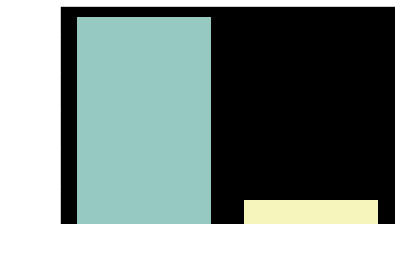

In [80]:
sns.countplot(df_cleaned['native-country'])

In [81]:
df_cleaned.rename(columns={'native-country':'native/migrant'},inplace=True)

In [82]:
df_cleaned['native/migrant'].value_counts()

Native     27267
Migrant     3192
Name: native/migrant, dtype: int64

In [83]:
####


In [84]:
df_cleaned.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native/migrant,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Native,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Native,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Native,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Native,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Migrant,<=50K


#### Race

In [85]:
df_cleaned.race.value_counts()

 White                 26071
 Black                  2891
 Asian-Pac-Islander      965
 Amer-Indian-Eskimo      285
 Other                   247
Name: race, dtype: int64

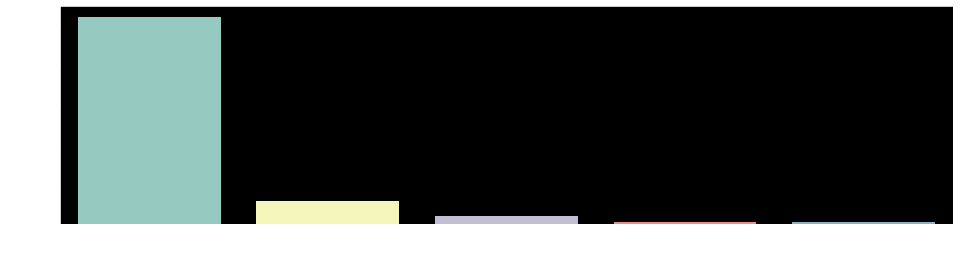

In [86]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned.race)

* Even the race is a biased in the Dataset

In [87]:
for race in df_cleaned.race.unique():
  print('{0:0.2f}% of people are {1}'.format(df_cleaned.workclass.value_counts()[0]/len(df_cleaned)*100,race))


74.10% of people are  White
74.10% of people are  Black
74.10% of people are  Asian-Pac-Islander
74.10% of people are  Amer-Indian-Eskimo
74.10% of people are  Other


#### Hours-per-week

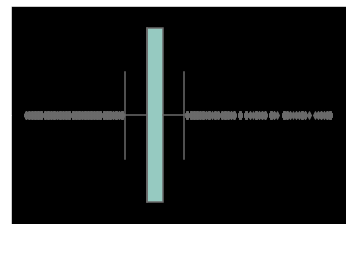

In [88]:
sns.boxplot(df_cleaned['hours-per-week'])

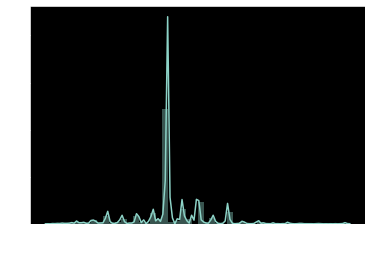

In [89]:
sns.distplot(df_cleaned['hours-per-week'])

In [90]:
df_cleaned['hours-per-week'].describe()

count    30459.000000
mean        41.056010
std         11.894697
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

* On average an employee works roughly around 6Hrs. 

#### Capital-gain / Capital-loss / fnlwgt

In [91]:
df_cleaned.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native/migrant,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Native,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Native,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Native,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Native,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Migrant,<=50K


In [92]:
df_cleaned.describe()[['capital-gain','capital-loss']]

,capital-gain,capital-loss
count,30459.000000,30459.000000
mean,1099.554188,88.603664
std,7478.322635,404.180102
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,99999.000000,3900.000000


Text(0.5, 1.0, 'Capital-gain')

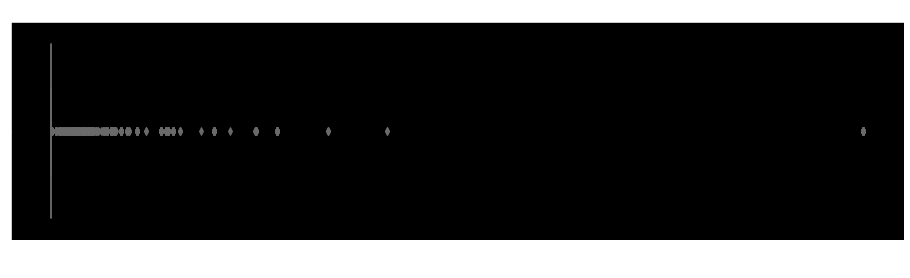

In [93]:
plt.figure(figsize=(16,4))
sns.boxplot(df_cleaned['capital-gain'])
plt.title('Capital-gain')

Text(0.5, 1.0, 'Capital-loss')

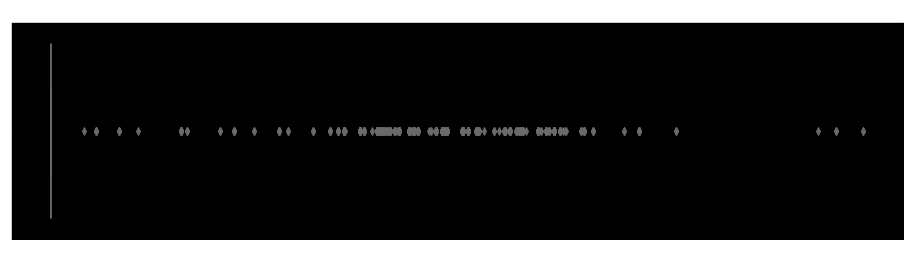

In [94]:
plt.figure(figsize=(16,4))
sns.boxplot(df_cleaned['capital-loss'])
plt.title('Capital-loss')

In [95]:
df_cleaned['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2206, 2205, 1726, 2444,
       1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594, 3004, 2231,
       1844,  810, 2824, 2559, 2057, 1974,  974, 2174, 2149, 1735, 1258,
       2129, 2603, 2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 2267,
       2080, 2457,  419,  155, 3900, 2201, 2467, 3683, 2754, 2472, 1411],
      dtype=int64)

In [96]:
df_cleaned['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  9386,
        2463,  3103, 10605,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,  2829,  2977,  4934,  2354,  2964,  3464,  5455, 15020,
        1424,  3273, 22040,  4416, 10566,  7430, 34095,  6497,  3908,
         114,  7896,  2346,  2907,  1151,  2414,  2290,  3418, 41310,
        4508,  2538,  3456,  1848,  3887,  5721,  9562,  6418,  1455,
        2036,  3942,  1831, 11678,  2936,  2993, 15831,  7443,  6360,
        4687,  1797,  6723,  2009,  3432,  6097,  1639,  2653,  2062,
       25124, 18481,  7978,   991,  1173,  2387,  5060,  1086],
      dtype=int64)

In [97]:
df_cleaned['capital-loss'].value_counts()

0       29012
1902      199
1977      167
1887      157
1848       50
        ...  
1816        1
2457        1
1844        1
2201        1
1735        1
Name: capital-loss, Length: 88, dtype: int64

In [98]:
df_cleaned['capital-gain'].value_counts()

0        27905
15024      343
7688       278
7298       244
99999      153
         ...  
7978         1
2387         1
6097         1
1639         1
18481        1
Name: capital-gain, Length: 116, dtype: int64

In [99]:
27905/len(df_cleaned)*100

91.6149578121409

In [100]:
29012/len(df_cleaned)*100

95.24935158737976

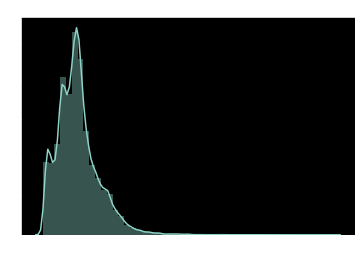

In [101]:
sns.distplot(df_cleaned.fnlwgt)

* More than 91% of data is 0 in the features `capital-gain` and `capital-loss`
* Thus ,it is a best option to drop both the columns
* The `fnlwgt` (final weight) feature should be removed as it has no predictive power since it is a feature
aimed to allocate similar weights to people with similar demographic characteristics.

In [102]:
df_cleaned.drop(['capital-loss','capital-gain','fnlwgt'],1,inplace=True)

In [103]:
df_cleaned.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native/migrant,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,Native,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,Native,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,Native,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,Native,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Migrant,<=50K


In [104]:
df_cleaned['marital-status'].value_counts()

 Married-civ-spouse       14212
 Never-married             9879
 Divorced                  4245
 Separated                  957
 Widowed                    763
 Married-spouse-absent      382
 Married-AF-spouse           21
Name: marital-status, dtype: int64

## Multivariate Analysis

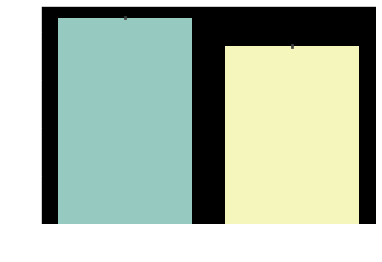

In [105]:
sns.barplot(df_cleaned.gender,df_cleaned['hours-per-week'])

In [106]:
# males work more hours on average than a female

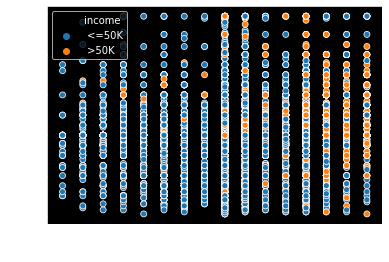

In [107]:
sns.scatterplot(df_cleaned['educational-num'],df_cleaned['hours-per-week'],hue=df_cleaned.income,palette='tab10')

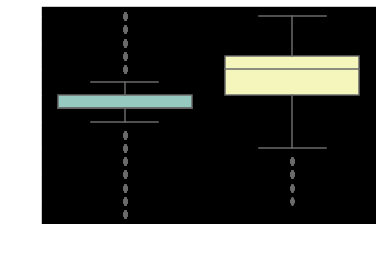

In [108]:
sns.boxplot(df_cleaned.income,df_cleaned['educational-num'])

* The salary is more likely to be above 50 Grand if you are highly educated

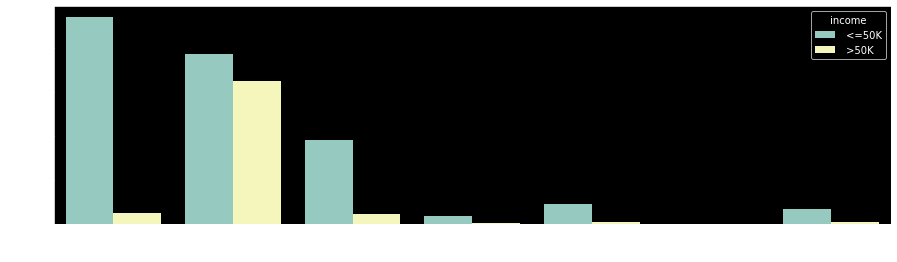

In [109]:
plt.figure(figsize=(15,4))
sns.countplot(df_cleaned['marital-status'],hue=df_cleaned.income)

* the most married individual have salary greater than or equal to 50K

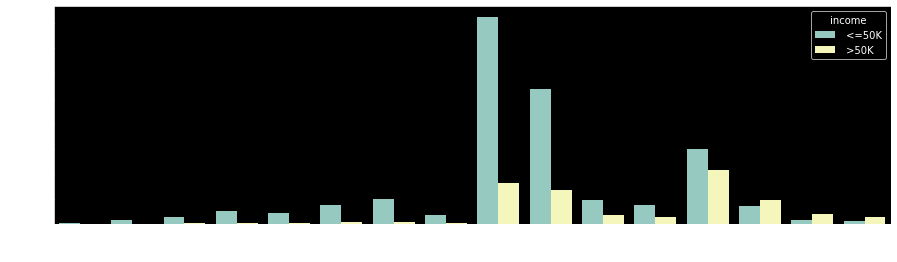

In [110]:
plt.figure(figsize=(15,4))
sns.countplot(df_cleaned['educational-num'],hue=df_cleaned.income)

* most of the bachelors salary more than 50K

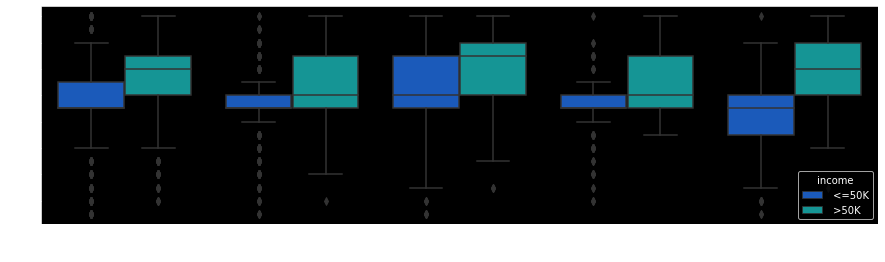

In [111]:
plt.figure(figsize=(15,4))
sns.boxplot(df_cleaned['race'],df_cleaned['educational-num'],df_cleaned.income,palette='winter')

## X and y train / test split

In [112]:
df_cleaned.shape

(30459, 11)

In [113]:
# splitting X and y
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [114]:
X.shape,y.shape

((30459, 10), (30459,))

In [115]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21321, 10), (21321,), (9138, 10), (9138,))

## Encoding and Feature scaling the data

In [116]:
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native/migrant
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,Native
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,Native
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,Native
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,Native
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Migrant


In [117]:
#### One Hot encoding

In [118]:
# all the features need one hot encoding

from feature_engine.missing_data_imputers import _find_numerical_variables
from feature_engine.categorical_encoders import OneHotCategoricalEncoder,_find_categorical_variables

cat_features = _find_categorical_variables(X)
num_features = _find_numerical_variables(X)
one_hot = OneHotCategoricalEncoder(variables=cat_features,drop_last=True)

In [119]:
# fit transform X_train
X_train = one_hot.fit_transform(X_train)
# transform X_test
X_test = one_hot.transform(X_test)

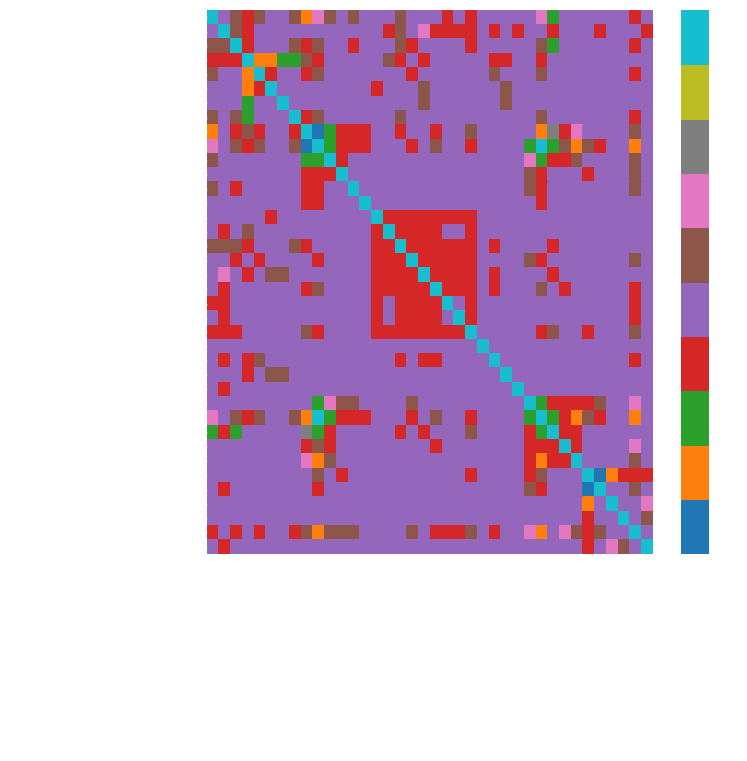

In [120]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),cmap='tab10')

In [121]:
# label encoding
from sklearn.preprocessing import LabelEncoder
lab_encoder = LabelEncoder()

y_train = lab_encoder.fit_transform(y_train)
y_test = lab_encoder.transform(y_test)

In [122]:
# standard scaling data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


for col in num_features:

  X_train[col] = sc_X.fit_transform(X_train[[col]])
  X_test[col] = sc_X.transform(X_test[[col]])

In [123]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21321, 38), (9138, 38), (21321,), (9138,))

## Training and finding the best model

In [144]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [145]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [125]:

def train_n_ret_score(estimator):
  """
  train the model and return the accuracy score of ther model
  """
  model = estimator
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)


In [126]:
# logistic regression
train_n_ret_score(LogisticRegression(max_iter=1000,C=10))

0.8325673013788575

In [127]:
# svc
train_n_ret_score(SVC())

0.8370540599693588

In [128]:
# decision tree
train_n_ret_score(DecisionTreeClassifier())

0.7838695557014664

In [129]:
# Adaboost
train_n_ret_score(AdaBoostClassifier(base_estimator=LogisticRegression()))

0.8272050776975268

In [130]:
# KNN
train_n_ret_score(KNeighborsClassifier())

0.8226088859706719

In [131]:
# Random Forest
train_n_ret_score(RandomForestClassifier())

0.8154957321076822

In [132]:
# Ridge 
train_n_ret_score(RidgeClassifier(alpha=0.01))

0.8269862114248194

## Cross Validation and Best Pick

In [148]:
from sklearn.model_selection import cross_val_score

In [147]:
mean_cv=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest','Ridge Classifier','Adaboost']
models=[GaussianNB(), SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(max_iter=1000),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),RidgeClassifier(alpha=0.01),AdaBoostClassifier()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,X_train,y_train,scoring = "accuracy")
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

GaussianNB()


KeyboardInterrupt: 

In [150]:
# choosing the best model


models = [LogisticRegression(max_iter=1000),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [151]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.830355,0.832020,0.832020,0.832020,0.832020,0.828995
1,SVC,0.842315,0.837054,0.837054,0.837054,0.837054,0.833591
2,KNN,0.867267,0.822609,0.822609,0.822609,0.822609,0.814971
3,Random_forest,0.971484,0.784636,0.784636,0.784636,0.784636,0.776886
4,Decision_Treee,0.971390,0.814839,0.814839,0.814839,0.814839,0.814690
5,Gradient_boost,0.842174,0.839680,0.839680,0.839680,0.839680,0.835843
6,Adaboost,0.833075,0.838805,0.838805,0.838805,0.838805,0.830918


* Gradient model gives us the best `Cross validation Score`

In [153]:
# selecting the best model

In [154]:
best_model = GradientBoostingClassifier()

In [155]:
best_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [160]:
train_n_ret_score(GradientBoostingClassifier())

0.8396804552418472

In [161]:
y_preds = best_model.predict(X_test)

In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6883
           1       0.71      0.59      0.64      2255

    accuracy                           0.84      9138
   macro avg       0.79      0.76      0.77      9138
weighted avg       0.83      0.84      0.83      9138



In [157]:
# saving the model

In [158]:
import joblib 

In [164]:
joblib.dump(best_model,'adult.pkl')

['adult.pkl']